<a href="https://colab.research.google.com/github/Iago-pixel/graficocovidvacinasbrasil/blob/main/Dados_Covid_Grafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

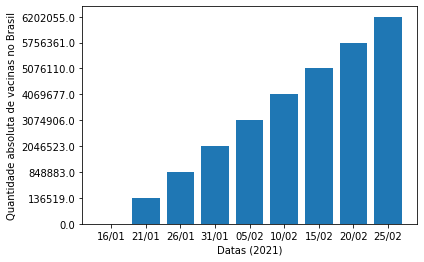

In [ ]:
!pip install -q matplotlib
from matplotlib import pyplot as plt
import csv

def obter_dados():
    with open('country_vaccinations.csv') as f:
        return [dict(dado_vacina) for dado_vacina in csv.DictReader(f)]

def dado_brasil(dados_mundo):
  new_dados = []
  for i in dados_mundo:
    if i['country'] == 'Brazil':
      new_dados.append(i)
  #print(new_dados)
  return new_dados

def corrigir_dados_datas(lista_de_dados): #ano-mês-dia -> dia/mês (ano sempre é 2021 no caso observado)
  for dado in lista_de_dados:
    temp_lista = dado['date'].split('-')
    temp_lista.reverse()
    temp_lista.pop()
    dado['date'] = '/'.join(temp_lista)
  return lista_de_dados

def pegar_dados_de_dicionarios(lista_de_dados, posicao): #pega alguns valores de um determinado campo
  valores = []
  for i in range(0,len(lista_de_dados),5):
    valores.append(lista_de_dados[i][posicao])
  return valores

dados_vacina = obter_dados()

dados_brasil = dado_brasil(dados_vacina)

dados_brasil = corrigir_dados_datas(dados_brasil)


datas = pegar_dados_de_dicionarios(dados_brasil, 'date')
vacinados = pegar_dados_de_dicionarios(dados_brasil, 'people_vaccinated')

plt.xlabel('Datas (2021)')
plt.ylabel('Quantidade absoluta de vacinas no Brasil')
plt.bar(datas, vacinados)

plt.savefig('vacinados_por_data.png',bbox_inches='tight')